# 회귀

- 회귀(regression):입력변수인 x의 정보를 활용하여 연속형 출력 변수 y 예측

## 선형 회귀

- 잔차: 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델: 직선과 데이터의 차이가 평균적으로 가장 작아지는 직선, 전체 데이터의 잔차(오류 값)합이 최소가 되는 모델을 만드는것
- Eroor^2 = RSS
- 회귀에서 RSS는 비용이며 w변수(회귀 계수)로 구성되는 RSS를 비용함수라 함
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습시키면서 비용함수가 반환하는 값(오류 값)을 지속해 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구함
- 비용함수 = 손실함수

- RSS를 최소화 시키는 이유는 잔차의 합이 0이 되는 해는 무수히 많고, 절대값의 합은 미분이 불가능한 형태로 RSS만 미분이 가능하며 유일한 해를 찾을 수 있음

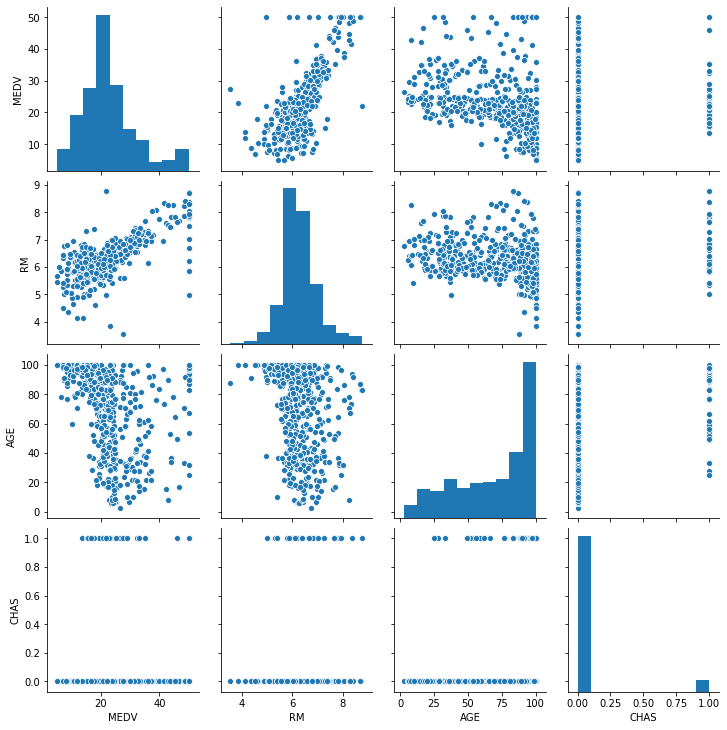

In [2]:
'''
CRIM: 범죄율 
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율
'''
#회귀 분석- 보스턴 집값 예측

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

boston = load_boston()
dir(boston)

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

df = pd.concat([dfX, dfy], axis=1)
df.tail()
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

* 종속변수인 집값(MEDV)과 방 개수(RM), 노후화 정도(AGE)와 어떤 관계를 가지는지 알 수 있다.
* 방 개수가 증가할 수록 집값은 증가하는 경향이 뚜렷하다.
* 노후화 정도와 집값은 관계가 없어 보인다.

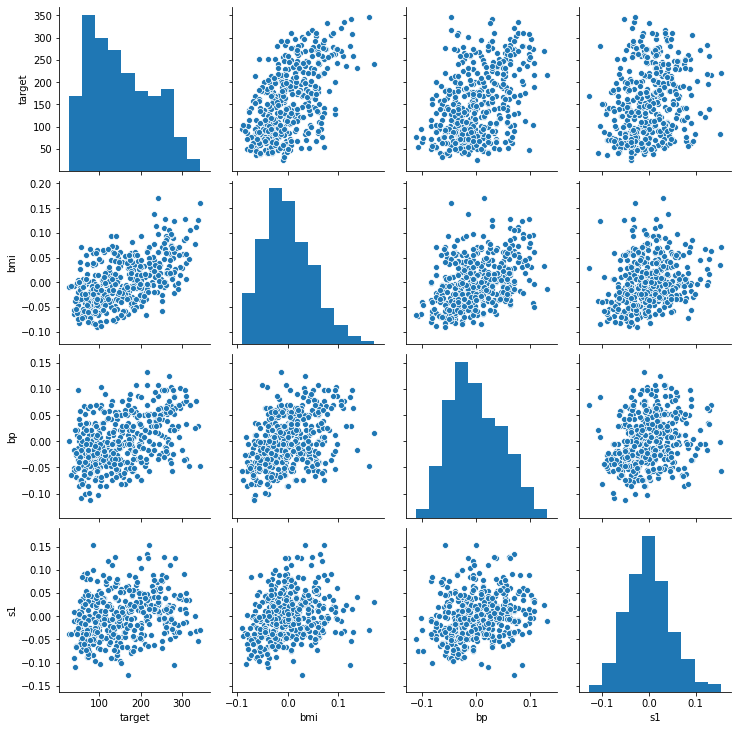

In [3]:
'''
age: 나이
sex: 성별
bmi: BMI(Body mass index)지수
bp: 평균혈압
s1~s6: 6종류의 혈액검사수치
'''
#회귀분석- 당뇨병 진행도 예측

from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

* 독립변수인 BMI지수와 평균혈압이 종속변수인 당뇨병 진행도와 양의 상관관계를 가지는 것을 볼 수 있다.
* 또한 두 독립변수 BMI지수와 평균혈압도 서로 양의 상관관계를 가진다.
* 이렇게 독립변수끼리 상관관계를 가지는 것을 다중공선성(multicolinearity)이라고 한다.
* 다중공선성은 회귀분석의 결과에 영향을 미칠 수 있다

### 선형 회귀 분석

- 최소자승법(OLS)는 잔차제곱합(RSS)를 최소화하는 가중치 벡터를 구하는 방법
- 잔차의 크기를 가장 작게 하는 가중치 벡터를 구하기 위해 잔차 제곱합을 미분하여 그레디언트 벡터를 구함(그레디언트 벡터가 0이어야함=직교방정식)

In [5]:
# numPy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석 수행 코드
from sklearn.datasets import make_regression
import numpy as np
import statsmodels.api as sm

bias = 100
X0, y, w = make_regression( n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)

#statsmodels 패키지의 상수항 결합을 위한 add_constant 함수
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)
 
#x와 y 관계 y=100+86.44794301x+ϵ
w

array(86.44794301)

In [6]:
#OLS 해를 직접 이용하는 방법으로 선형 회귀 계수 추정
w = np.linalg.inv(X.T @ X) @ X.T @ y

#최소자승법으로 구한 선형회귀모형 y^=99.79150869+86.96171201x
w

array([[99.79150869],
       [86.96171201]])

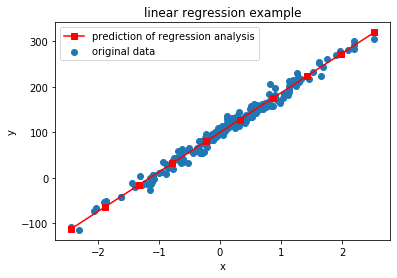

In [8]:
#선형 회귀를 통해 구한 가중치 벡터는 정답과 비슷하지만 똑같지는 않다
# 원래 데이터와 비교
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new) # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="original data")
plt.plot(x_new, y_new, 'rs-', label="prediction of regression analysis")
plt.xlabel("x")
plt.ylabel("y")
plt.title("linear regression example")
plt.legend()
plt.show()

#### statsmodels 패키지 OLS 클래스를 사용한 선형 회귀 분석

1) 독립변후와 종속변수가 모두 포함된 데이터프레임 생성, 상수항 결함은 하지 않아도 됨
2) fit 메서드로 모형 추정, 결과는 RegressionResult 클래스 객체로 출력

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        11:26:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston() # 데이터를 로드하고 두 개의 특성만 선택
features = boston.data[:,0:2]
target = boston.target
regression = LinearRegression() # 선형 회귀 모델 생성
model = regression.fit(features, target) # 선형 회귀 모델 훈련

model.intercept_ # 편향 확인
model.coef_ # 특성의 계수 확인
target[0]*1000 # 타깃 벡터의 첫 번째 값에 1000을 곱함

24000.0

In [14]:
# 첫번째 특성은 인당 범죄율로서 이 특성의 모델 계수는 -0.35입니다.
# 타깃 벡터가 천 달러 단위의 주택 가격이므로 계수에 1,000을 곱하면 인구당 범죄율이 1만큼 증가될 때 주책 가격의 변화를 알 수 있습니다.

model.predict(features)[0]*1000 # 첫 번째 샘플의 타깃 값을 예측하고 1000을 곱합니다.
model.coef_[0]*1000 # 첫 번째 계수에 1000을 곱합니다.
#인구당 범죄율이 1씩 증가될 때마다 주택 가격은 $350 정도 감소한다

-352.07831564026765

### 교차 특성 처리

- 타깃 변수에 영향을 미치면서 다른 특성에 의존하는 특성 존재
- PolynomialFeatures를 사용해 특성의 모든 조합에 대한 교차항을 만든 다음 모델 선택 전략을 사용해 최선의 모델을 만드는 특성 조합과 교차항을 찾음


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston() # 데이터를 로드하고 두 개의 특성만 선택
features = boston.data[:,0:2]
target = boston.target

# 교차 항 생성
interaction = PolynomialFeatures( degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)
regression = LinearRegression() # 선형 회귀 모델 객체 생성
model = regression.fit(features_interaction, target) # 선형 회귀 모델 훈련
features[0] # 첫 번째 샘플 특성 값 확인

import numpy as np

# 각 샘플에서 첫 번째와 두 번째 특성 곱함
interaction_term = np.multiply(features[:, 0], features[:, 1])
interaction_term[0] # 첫 번째 샘플의 교차 항을 확인
features_interaction[0] # 첫 번째 샘플의 값을 확인

array([6.3200e-03, 1.8000e+01, 1.1376e-01])

### 규제로 분산 축소

- 리지 회귀나 라소 회귀와 같이 축소 페널티가 포함된 학습 알고리즘 사용
- 선형 회귀에서의 모델이 정답과 예측 사이의 제곱 오차 합 또는 RSS를 최소화하기 위해 훈련

In [16]:
#규제로 분산 축소

from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

boston = load_boston() # 데이터 로드
features = boston.data
target = boston.target

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)
regression = Ridge(alpha=0.5) # alpha 값을 지정한 릿지 회귀 생성
model = regression.fit(features_standardized, target) # 선형 회귀 모델 훈련

In [17]:
from sklearn.linear_model import RidgeCV

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0]) # 세 개의 alpha 값에 대한 릿지 회귀 객체 생성
model_cv = regr_cv.fit(features_standardized, target) # 선형 회귀 모델 훈련
model_cv.coef_ # 계수 확인
model_cv.alpha_ # alpha 값을 확인

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5) # 5-폴드 교차검증을 사용하여 릿지 회귀 객체 생성
model_cv = regr_cv.fit(features_standardized, target) # 선형 회귀 모델을 훈련합니다.
model_cv.alpha_ # alpha 값을 확인

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5) # 5-폴드 교차검증을 사용하여 릿지 회귀 객체 생성

model_cv = regr_cv.fit(features_standardized, target) # 선형 회귀 모델을 훈련
model_cv.alpha_ # alpha 값을 확인

10.0

### 라쏘 회귀

- w의 절대값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것
- RSS와 전체 계수값의 합인 페널티를 최소화
- L2규제가 회귀 계수의 크기를 감소시키는 데 반해 L2규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
- L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성 함유

In [18]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

boston = load_boston() # 데이터 로드
features = boston.data
target = boston.target
scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

regression = Lasso(alpha=0.5) # alpha 값을 지정한 라쏘 회귀 객체 생성
model = regression.fit(features_standardized, target) # 선형 회귀 모델 훈련
model.coef_ # 계수 확인

regression_a10 = Lasso(alpha=10) # 큰 alpha 값을 지정한 라쏘 회귀 객체 생성
model_a10 = regression_a10.fit(features_standardized, target)
model_a10.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [19]:
# 라쏘 회귀로 특성 축소
# alpha 값이 너무 크게 증가하면 어떤 특성도 사용되지 않음
# 라쏘의 alpha 값을 찾기 위해 LassoCV 클래스 사용

from sklearn.linear_model import LassoCV

# 세 개의 alpha 값에 대한 라쏘 회귀 생성
lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)

model_cv = lasso_cv.fit(features_standardized, target) # 선형 회귀 모델 훈련
model_cv.coef_ # 계수를 확인
model_cv.alpha_ # alpha 값을 확인

# 1000개의 alpha 값을 탐색하는 라쏘 회귀 생성
lasso_cv = LassoCV(n_alphas=1000, cv=5)

model_cv = lasso_cv.fit(features_standardized, target) # 선형 회귀 모델 훈련
model_cv.alpha_ # 계수를 확인
lasso_cv.alphas_ # alpha 값을 확인

array([6.77765364e+00, 6.73095006e+00, 6.68456831e+00, 6.63850616e+00,
       6.59276142e+00, 6.54733189e+00, 6.50221542e+00, 6.45740983e+00,
       6.41291299e+00, 6.36872277e+00, 6.32483706e+00, 6.28125375e+00,
       6.23797077e+00, 6.19498605e+00, 6.15229752e+00, 6.10990315e+00,
       6.06780092e+00, 6.02598880e+00, 5.98446481e+00, 5.94322695e+00,
       5.90227325e+00, 5.86160175e+00, 5.82121052e+00, 5.78109761e+00,
       5.74126112e+00, 5.70169913e+00, 5.66240975e+00, 5.62339112e+00,
       5.58464135e+00, 5.54615860e+00, 5.50794102e+00, 5.46998680e+00,
       5.43229411e+00, 5.39486116e+00, 5.35768615e+00, 5.32076731e+00,
       5.28410287e+00, 5.24769107e+00, 5.21153018e+00, 5.17561847e+00,
       5.13995423e+00, 5.10453573e+00, 5.06936130e+00, 5.03442925e+00,
       4.99973792e+00, 4.96528563e+00, 4.93107075e+00, 4.89709163e+00,
       4.86334666e+00, 4.82983422e+00, 4.79655271e+00, 4.76350054e+00,
       4.73067612e+00, 4.69807789e+00, 4.66570428e+00, 4.63355376e+00,
      

### 로지스틱 회귀

- 선형 회귀 방식을 분류에 적용한 알고리즘
- 회귀가 선형인가 비선형인가하 하는 독립변수가 아닌 가중치(weight)변수가 선형인지에 따름
- 시그모이드 함수 최적선을 찾고, 시그모이드 함수의 반환 값을 확률로 간주해 학률에 따라 분류 결정
- 독립변수를 시그모이드 함수에 입력해 반환된 결과를 확률값으로 변환, 예측 레이블 결정
- 시그모이드 함수는 x값이 아무리 크거나, 작더라도 y값은 항상 0과 1사이에 반환, x가 0일때 y는0.5 임 